# Modul 05 - Multi Qubits & Verschränkte Zustände

Eine Schulungsserie der Meetup-Gruppe **[Quantum Computing meets Business - Rhineland](https://www.meetup.com/de-DE/Quantum-Computing-meets-Business-Rhineland/)**

(Adapted from [qiskit-textbook](https://github.com/qiskit-community/qiskit-textbook))

In [ ]:
run ./00-Inhalt_Tools.ipynb

Einzelne Qubits sind interessant, aber einzeln bieten sie keinen rechnerischen Vorteil. Wir werden uns nun ansehen, wie wir mehrere Qubits darstellen und wie diese Qubits miteinander interagieren können. Wir haben gesehen, wie wir den Zustand eines Qubits mit einem 2D-Vektor darstellen können, jetzt werden wir sehen, wie wir den Zustand mehrerer Qubits darstellen können.

## Inhaltsverzeichnis
1. [Darstellung von Multi-Qubit Zuständen](#represent)    
    1.1 [Übungen](#ex1)
2. [Ein-Qubit Gatter auf Multi-Qubit Zustandsvektor](#single-qubit-gates)    
    2.1 [Übungen](#ex2)
3. [Multi-Qubit Gatter](#multi-qubit-gates)    
    3.1 [Das CNOT-Gatter](#cnot)  
    3.2 [Verschränkte Zustände](#entangled)  
    3.3 [Visualisierung verschränkter Zustände](#visual)    
    3.4 [Übungen](#ex3)


## 1. Darstellung von Multi-Qubit Zuständen <a id="represent"></a>

Wir haben gesehen, dass ein einzelnes Bit zwei mögliche Zustände hat, und ein Qubit-Zustand hat zwei komplexe Amplituden. Analog dazu haben zwei Bits vier mögliche Zustände:

`00` `01` `10` `11`

Und um den Zustand von zwei Qubits zu beschreiben, braucht man vier komplexe Amplituden. Wir speichern diese Amplituden in einem 4D-Vektor wie folgt:

$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

Die Regeln der Messung funktionieren immer noch auf die gleiche Weise:

$$ p(|00\rangle) = |\langle 00 | a \rangle |^2 = |a_{00}|^2$$

Und die gleichen Implikationen gelten, wie die Normalisierungsbedingung:

$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$$

Wenn wir zwei getrennte Qubits haben, können wir ihren gemeinsamen Zustand durch das Tensorprodukt beschreiben:

$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}
$$

Und nach den gleichen Regeln können wir das Tensorprodukt verwenden, um den kollektiven Zustand einer beliebigen Anzahl von Qubits zu beschreiben. Hier ist ein Beispiel mit drei Qubits:

$$ 
|cba\rangle = \begin{bmatrix} c_0 b_0 a_0 \\ c_0 b_0 a_1 \\ c_0 b_1 a_0 \\ c_0 b_1 a_1 \\
                              c_1 b_0 a_0 \\ c_1 b_0 a_1 \\ c_1 b_1 a_0 \\ c_1 b_1 a_1 \\
              \end{bmatrix}
$$

Wenn wir $n$ Qubits haben, müssen wir $2^n$ komplexe Amplituden im Auge behalten. Wie wir sehen können, wachsen diese Vektoren exponentiell mit der Anzahl der Qubits. Dies ist der Grund, warum Quantencomputer mit einer großen Anzahl von Qubits so schwierig zu simulieren sind. Ein moderner Laptop kann leicht einen allgemeinen Quantenzustand von etwa 20 Qubits simulieren, aber die Simulation von 100 Qubits ist zu schwierig für die größten Supercomputer.

Schauen wir uns eine Beispielschaltung an:

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/ipykernel/pylab/config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
qc = QuantumCircuit(3)
# H-Gatter auf jedes Qubit anwenden:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

Jedes Qubit befindet sich im Zustand $|+\rangle$, wir sollten also den Vektor sehen:

$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [3]:
# Lassen Sie uns das Ergebnis sehen
svsim = Aer.get_backend('statevector_simulator')
job = execute(qc, svsim)
final_state = job.result().get_statevector()

print(final_state)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


Und wir haben unser erwartetes Ergebnis.

### 1.2 Kurzübungen: <a id="ex1"></a>

1.	Schreiben Sie das Tensorprodukt der Qubits auf:    
    a)	$|0\rangle|1\rangle$    
    b)	$|0\rangle|+\rangle$    
    c)	$|+\rangle|1\rangle$    
    d)	$|-\rangle|+\rangle$    
2.	Schreiben Sie den Zustand:
    $|\psi\rangle = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{i}{\sqrt{2}}|01\rangle $
    als zwei einzelne Qubits


## 2. Ein-Qubit Gatter auf Multi-Qubit Zustandsvektor <a id="single-qubit-gates"></a>

Wir haben gesehen, dass ein X-Gatter durch die Matrix dargestellt wird:

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

Und dass es so auf den Zustand $|0\rangle$ wirkt:

$$
X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix}
$$

aber es ist vielleicht nicht klar, wie ein X-Gatter auf ein Qubit in einem Multi-Qubit-Vektor wirken würde. Glücklicherweise ist die Regel recht einfach; so wie wir das Tensorprodukt verwendet haben, um Multi-Qubit-Zustandsvektoren zu berechnen, verwenden wir das Tensorprodukt, um Matrizen zu berechnen, die auf diese Zustandsvektoren wirken. Zum Beispiel in der folgenden Schaltung:

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

wir können die gleichzeitigen Operationen (H & X) durch ihr Tensorprodukt darstellen:

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

Die Operation sieht folgendermaßen aus:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Die wir dann auf unseren 4D-Zustandsvektor $|q_1 q_0\rangle$ anwenden können. Das kann ziemlich unübersichtlich werden, Sie werden also oft die klarere Schreibweise sehen:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

Anstatt dies von Hand zu berechnen, können wir den `unitary_simulator` von Qiskit verwenden, um dies für uns zu tun. Der unitäre Simulator multipliziert alle Gatter in unserer Schaltung miteinander, um eine einzige unitäre Matrix zu kompilieren, die die gesamte Quantenschaltung ausführt:

In [5]:
usim = Aer.get_backend('unitary_simulator')
job = execute(qc, usim)
unitary = job.result().get_unitary()

und sehen Sie sich die Ergebnisse an:

In [6]:
print(unitary)

[[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


Wenn wir ein Gatter jeweils nur auf ein Qubit anwenden wollen (wie in der Schaltung unten), beschreiben wir dies durch ein Tensorprodukt mit der Identitätsmatrix, z. B.:

$$ X \otimes I $$

In [7]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [8]:
# Simulate the unitary
usim = Aer.get_backend('unitary_simulator')
job = execute(qc, usim)
unitary = job.result().get_unitary()
print(unitary)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


Wir können sehen, dass Qiskit das Tensorprodukt durchgeführt hat:
$$
X \otimes I =
\begin{bmatrix} 0 & I \\
               I & 0\\
\end{bmatrix} = 
\begin{bmatrix} 0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                1 & 0 & 0 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

### 2.1 Kurzübungen: <a id="ex2"></a>

1. Berechnen Sie die Ein-Qubit-Unitary ($U$), die durch die Folge von Gattern erzeugt wird: $U = XZH$. Verwenden Sie den Unitary-Simulator von Qiskit, um Ihre Ergebnisse zu überprüfen.
2. Versuchen Sie, die Gatter in der obigen Schaltung zu verändern. Berechnen Sie deren Tensorprodukt und überprüfen Sie dann Ihre Antwort mit dem Unitary Simulator.

**Hinweis:** Verschiedene Bücher, Softwares und Webseiten ordnen ihre Qubits unterschiedlich an. Das bedeutet, dass das Tensorprodukt der gleichen Schaltung sehr unterschiedlich aussehen kann. Versuchen Sie, dies zu berücksichtigen, wenn Sie andere Quellen zu Rate ziehen. 

## 3. Multi-Qubit Gatter <a id="multi-qubit-gates"></a>

Nachdem wir nun wissen, wie man den Zustand mehrerer Qubits darstellen kann, sind wir nun bereit zu lernen, wie Qubits miteinander interagieren. Ein wichtiges Zwei-Qubit-Gatter ist das CNOT-Gatter. 

### 3.1 Das CNOT-Gatter <a id="cnot"></a>

Sie haben dieses Gatter bereits in _[The Atoms of Computation](../ch-states/atoms-computation.html) kennengelernt._ Dieses Gatter ist ein bedingtes Gatter, das ein X-Gatter auf dem zweiten Qubit (Ziel) durchführt, wenn der Zustand des ersten Qubits (Steuerung) $|1\rangle$ ist. Das Gatter wird auf einer Schaltung wie dieser gezeichnet, mit `q0` als Steuerung und `q1` als Ziel: 

In [9]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

Wenn unsere Qubits nicht in Überlagerung von $|0\rangle$ oder $|1\rangle$ sind (sich also wie klassische Bits verhalten), ist dieses Gatter sehr einfach und intuitiv zu verstehen. Wir können die klassische Wahrheitstabelle verwenden: 

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

Und auf unseren 4D-Zustandsvektor wirkend, hat er eine der beiden Matrizen: 

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

je nachdem, welches Qubit die Steuerung und welches das Ziel ist. Verschiedene Bücher, Simulatoren und Papiere ordnen ihre Qubits unterschiedlich an. In unserem Fall entspricht die linke Matrix dem CNOT in der obigen Schaltung. Diese Matrix vertauscht die Amplituden von $|01\rangle$ und $|11\rangle$ in unserem Zustandsvektor:

$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

Wir haben gesehen, wie sich dies auf klassische Zustände auswirkt, aber nun wollen wir sehen, wie es sich auf ein Qubit in Superposition auswirkt. Wir werden ein Qubit in den Zustand $|+\rangle$ versetzen:

In [10]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [11]:
# Let's see the result:
svsim = Aer.get_backend('statevector_simulator')
job = execute(qc, svsim)
final_state = job.result().get_statevector()
print(final_state)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


Erwartungsgemäß ergibt dies den Zustand $|0\rangle \otimes |{+}\rangle = |0{+}\rangle$:

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$

Und schauen wir mal, was passiert, wenn wir das CNOT-Gatter anwenden:

In [12]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [13]:
# Let's get the result:
job = execute(qc, svsim)
result = job.result()
# Print the statevector neatly:
final_state = result.get_statevector()
print(final_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Wir sehen, wir haben den Zustand:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

Dieser Zustand ist für uns sehr interessant, weil er _verschränkt_ ist, was uns nahtlos zum nächsten Abschnitt führt.

### 3.2 Verschränkte Zustände <a id="entangled"></a>

Wir haben im vorigen Abschnitt gesehen, dass wir den Zustand erzeugen können:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

Dies ist ein sogenannter _Bell_-Zustand. Wir sehen, dass dieser Zustand eine 50%ige Wahrscheinlichkeit hat, im Zustand $|00\rangle$ gemessen zu werden, und eine 50%ige Chance, im Zustand $|11\rangle$ gemessen zu werden. Am interessantesten ist, dass er eine **0%ige** Chance hat, in den Zuständen $|01\rangle$ oder $|10\rangle$ gemessen zu werden. Wir können dies in Qiskit sehen:

/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/qiskit/visualization/counts_visualization.py:185: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


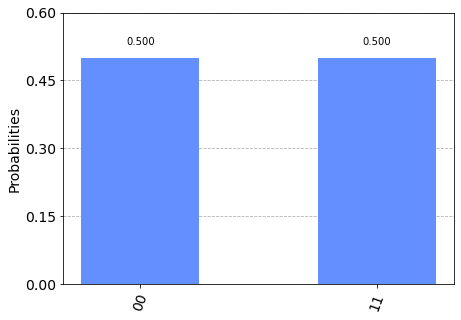

In [14]:
plot_histogram(result.get_counts())

Dieser kombinierte Zustand kann nicht als zwei separate Qubit-Zustände geschrieben werden, was interessante Implikationen hat. Obwohl sich unsere Qubits in Superposition befinden, wird uns die Messung des einen den Zustand des anderen verraten und dessen Superposition kollabieren lassen. Wenn wir zum Beispiel das obere Qubit messen und den Zustand $|1\rangle$ erhalten, ändert sich der kollektive Zustand unserer Qubits wie folgt:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

Selbst wenn wir diese Qubits Lichtjahre entfernt trennen würden, kollabiert die Messung eines Qubits die Superposition und scheint eine unmittelbare Wirkung auf das andere zu haben. Dies ist die ['spukhafte Fernwirkung'](https://en.wikipedia.org/wiki/Quantum_nonlocality), die so viele Physiker im frühen 20. Jahrhundert aufregte.

Es ist wichtig zu beachten, dass das Messergebnis zufällig ist und die Messstatistik des einen Qubits **nicht** durch irgendeine Operation am anderen Qubit beeinflusst wird. Aus diesem Grund gibt es **keine** Möglichkeit, gemeinsame Quantenzustände zur Kommunikation zu nutzen. Dies ist bekannt als das No-Communication-Theorem.[1]

### 3.3 Visualisierung verschränkter Zustände<a id="visual"></a>

Wir haben gesehen, dass dieser Zustand nicht als zwei separate Qubit-Zustände geschrieben werden kann. Das bedeutet auch, dass wir Informationen verlieren, wenn wir versuchen, unseren Zustand auf separaten Bloch-Kugeln darzustellen:

/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/qiskit/visualization/bloch.py:497: PendingDeprecationWarning: 
The w_xaxis attribute will be deprecated in a future version. Use xaxis instead.
  for item in (self.axes.w_xaxis.get_ticklines() +
/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/qiskit/visualization/bloch.py:500: PendingDeprecationWarning: 
The w_yaxis attribute will be deprecated in a future version. Use yaxis instead.
  for item in (self.axes.w_yaxis.get_ticklines() +
/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/qiskit/visualization/bloch.py:503: PendingDeprecationWarning: 
The w_zaxis attribute will be deprecated in a future version. Use zaxis instead.
  for item in (self.axes.w_zaxis.get_ticklines() +
/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/qiskit/visualization/bloch.py:497: PendingDeprecationWarning: 
The w_xaxis attribute will be deprecated in a future version. Use xa

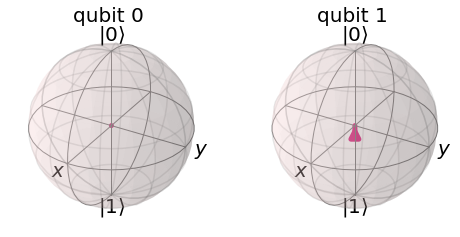

In [15]:
plot_bloch_multivector(final_state)

Wenn man bedenkt, wie wir die Bloch-Sphäre in den früheren Kapiteln definiert haben, ist es vielleicht nicht klar, wie Qiskit die Bloch-Vektoren mit verschränkten Qubits überhaupt so berechnet. Im Ein-Qubit-Fall entspricht die Position des Bloch-Vektors entlang einer Achse sehr schön dem Erwartungswert der Messung in dieser Basis. Wenn wir dies als _die_ Regel für die Darstellung von Bloch-Vektoren nehmen, kommen wir zu der oben genannten Schlussfolgerung. Dies zeigt uns, dass es _keine_ Ein-Qubit-Messbasis gibt, für die eine bestimmte Messung garantiert ist. Dies steht im Gegensatz zu unseren Einzel-Qubit-Zuständen, bei denen wir immer eine Einzel-Qubit-Basis wählen konnten. Wenn wir die einzelnen Qubits auf diese Weise betrachten, verpassen wir den wichtigen Effekt der Korrelation zwischen den Qubits. Wir können nicht zwischen verschiedenen verschränkten Zuständen unterscheiden. Zum Beispiel, die zwei Zustände:

$$\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \quad \text{and} \quad \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

sehen beide auf diesen separaten Bloch-Kugeln gleich aus, obwohl es sich um sehr unterschiedliche Zustände mit unterschiedlichen Messergebnissen handelt.

Wie könnten wir diesen Zustandsvektor sonst visualisieren? Dieser Zustandsvektor ist einfach eine Sammlung von vier Amplituden (komplexe Zahlen), und es gibt unendlich viele Möglichkeiten, diese auf ein Bild abzubilden. Eine solche Visualisierung ist die _Q-Kugel,_ hier wird jede Amplitude durch einen Blob auf der Oberfläche einer Kugel dargestellt. Die Größe des Kleckses ist proportional zum Betrag der Amplitude, und die Farbe ist proportional zur Phase der Amplitude. Die Amplituden für $|00\rangle$ und $|11\rangle$ sind gleich, und alle anderen Amplituden sind 0:

/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:741: PendingDeprecationWarning: 
The w_xaxis attribute will be deprecated in a future version. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:742: PendingDeprecationWarning: 
The w_yaxis attribute will be deprecated in a future version. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/Applications/anaconda3/envs/qcmb-training/lib/python3.8

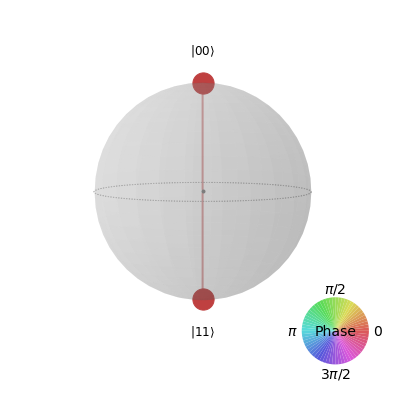

In [16]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

Hier können wir deutlich die Korrelation zwischen den Qubits sehen. Die Form der Q-Sphäre hat keine Bedeutung, sie ist einfach eine nette Art, unsere Blobs anzuordnen; die Anzahl der `0` im Zustand ist proportional zur Position des Zustands auf der Z-Achse, so dass wir hier sehen können, dass die Amplitude von $|00\rangle$ am oberen Pol der Kugel liegt und die Amplitude von $|11\rangle$ am unteren Pol der Kugel.

### 3.4 Übung: <a id="ex3"></a>
1. Erstellen Sie eine Quantenschaltung, die den Bell-Zustand erzeugt: $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.
   Verwenden Sie den Zustandsvektorsimulator, um Ihr Ergebnis zu überprüfen.
   
2. Die Schaltung, die Sie in Frage 1 erstellt haben, transformiert den Zustand $|00\rangle$ in $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$. Berechnen Sie die Unitarität dieser Schaltung mithilfe des Simulators von Qiskit. Überprüfen Sie, ob diese Unitary tatsächlich die korrekte Transformation durchführt.

3.  Überlegen Sie, wie Sie einen Zustandsvektor visuell darstellen können. Können Sie eine interessante Visualisierung entwerfen, aus der Sie den Betrag und die Phase der einzelnen Amplituden ablesen können?

## 4. Verweise

[1] Asher Peres, Daniel R. Terno, _Quantum Information and Relativity Theory,_ 2004, https://arxiv.org/abs/quant-ph/0212023

## Qiskit

In [17]:
import qiskit
qiskit.__qiskit_version__

/Applications/anaconda3/envs/qcmb-training/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}

## Copyright

Copyright 2021 Dual Software GmbH and SVA System Vertrieb Alexander GmbH

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0.

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.